# 串行BOOSTING集成学习

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成模拟数据，make_blobs接口生成500个数据点，特征数为5，标准差为1.5
X, y = make_blobs(n_samples=500, centers=5, random_state=42, cluster_std=1.5)
X = StandardScaler().fit_transform(X)


In [17]:

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 创建AdaBoost分类器，n_estimators=50表示基分类器数量为50，learning_rate=1.0表示学习率为1.0，random_state=42表示随机种子
# 基分类器默认是决策树，max_depth=1表示决策树的深度为1，即每个节点只有一个决策边界

# 设置基分类器为决策树，max_depth=3 表示决策树的深度为3，即每个节点有三个决策边界

ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# 训练模型
ada_boost.fit(X_train, y_train)

# 预测
y_pred = ada_boost.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost分类准确率: {accuracy:.4f}")



AdaBoost分类准确率: 0.9333


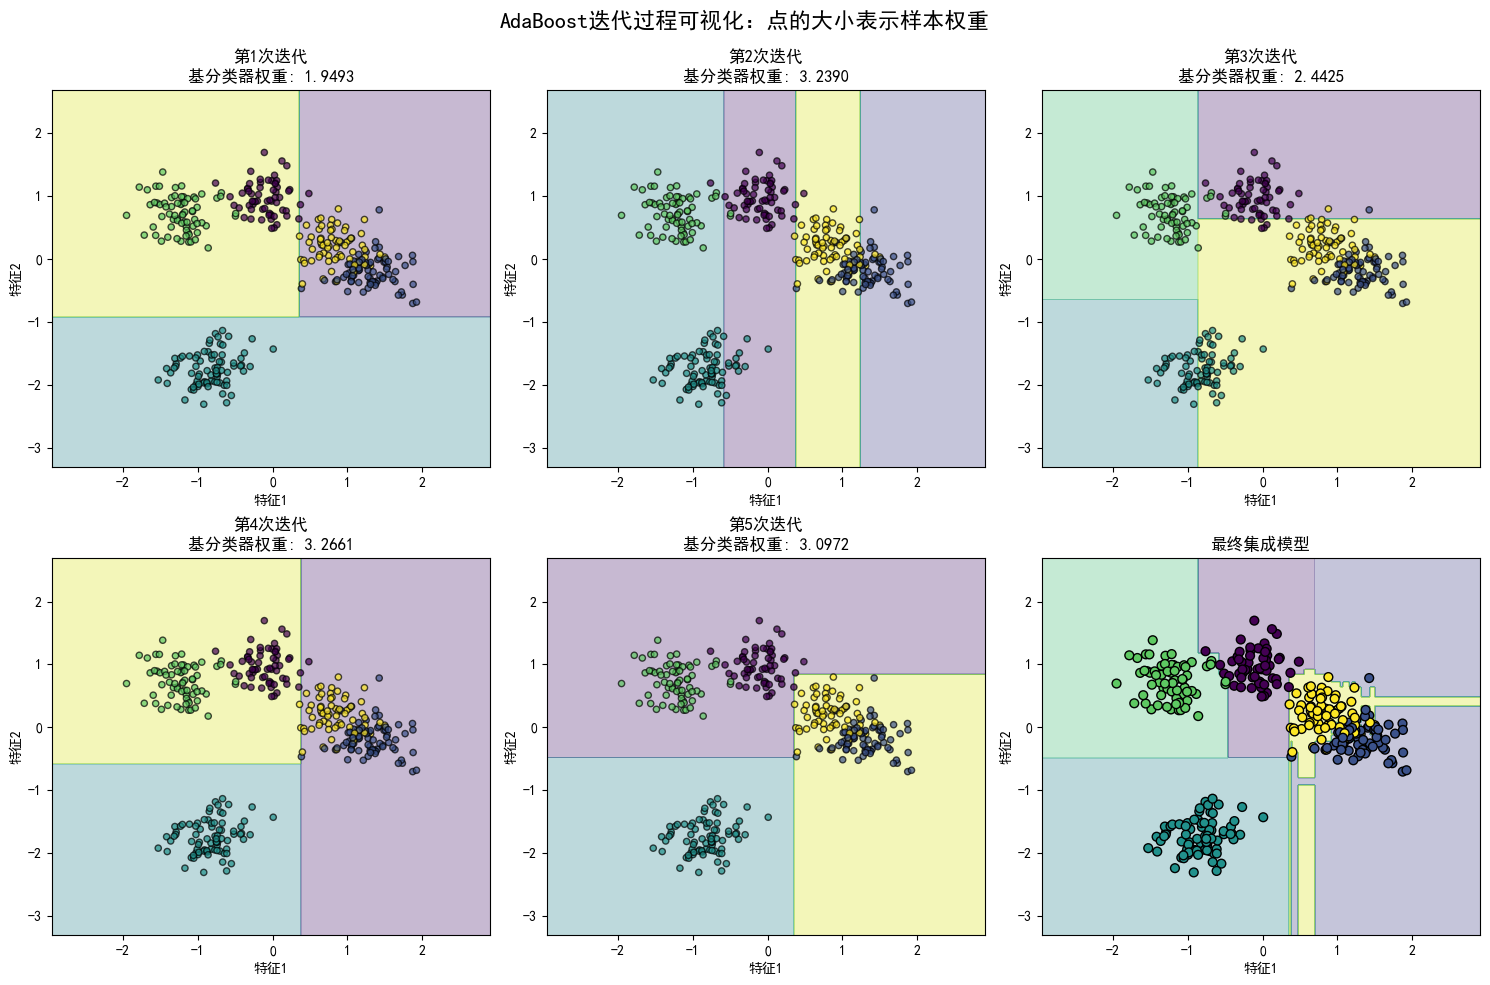

AdaBoost迭代过程解释：

第1次迭代:
  - 基分类器权重: 1.9493
  - 在这一轮中，算法关注那些之前分类错误的样本
  - 样本权重被调整，使得分类器更加关注难以分类的样本点

第2次迭代:
  - 基分类器权重: 3.2390
  - 在这一轮中，算法关注那些之前分类错误的样本
  - 样本权重被调整，使得分类器更加关注难以分类的样本点
  - 与上一轮相比，决策边界有所调整以适应高权重样本

第3次迭代:
  - 基分类器权重: 2.4425
  - 在这一轮中，算法关注那些之前分类错误的样本
  - 样本权重被调整，使得分类器更加关注难以分类的样本点
  - 与上一轮相比，决策边界有所调整以适应高权重样本

第4次迭代:
  - 基分类器权重: 3.2661
  - 在这一轮中，算法关注那些之前分类错误的样本
  - 样本权重被调整，使得分类器更加关注难以分类的样本点
  - 与上一轮相比，决策边界有所调整以适应高权重样本

第5次迭代:
  - 基分类器权重: 3.0972
  - 在这一轮中，算法关注那些之前分类错误的样本
  - 样本权重被调整，使得分类器更加关注难以分类的样本点
  - 与上一轮相比，决策边界有所调整以适应高权重样本


In [18]:
#图像可以显示中文，负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 可视化AdaBoost的前5次迭代过程
plt.figure(figsize=(15, 10))

# 创建一个网格用于绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# 为前5个基分类器创建子图
for i in range(5):
    plt.subplot(2, 3, i+1)
    
    # 获取当前基分类器
    estimator = ada_boost.estimators_[i]
    
    # 预测网格点的类别
    Z = estimator.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # 绘制训练数据点
    # 计算当前迭代中样本的权重（近似）
    if i == 0:
        sample_weights = np.ones(len(X_train)) / len(X_train)
    else:
        # 根据错误样本调整权重（简化表示）
        pred = ada_boost.estimators_[i-1].predict(X_train)
        incorrect = (pred != y_train)
        sample_weights = np.ones(len(X_train)) / len(X_train)
        sample_weights[incorrect] *= 1.5  # 增加错误样本的权重
        sample_weights = sample_weights / np.sum(sample_weights)
    
    # 根据权重调整点的大小
    sizes = 20 + 100 * sample_weights
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', 
                edgecolors='k', s=sizes, alpha=0.7)
    
    plt.title(f'第{i+1}次迭代\n基分类器权重: {ada_boost.estimator_weights_[i]:.4f}')
    plt.xlabel('特征1')
    plt.ylabel('特征2')

# 添加最终集成模型的结果
plt.subplot(2, 3, 6)
Z_final = ada_boost.predict(grid_points)
Z_final = Z_final.reshape(xx.shape)
plt.contourf(xx, yy, Z_final, alpha=0.3, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', 
            edgecolors='k', s=40)
plt.title('最终集成模型')
plt.xlabel('特征1')
plt.ylabel('特征2')

plt.tight_layout()
plt.suptitle('AdaBoost迭代过程可视化：点的大小表示样本权重', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

# 打印每次迭代的解释
print("AdaBoost迭代过程解释：")
for i in range(5):
    print(f"\n第{i+1}次迭代:")
    print(f"  - 基分类器权重: {ada_boost.estimator_weights_[i]:.4f}")
    print(f"  - 在这一轮中，算法关注那些之前分类错误的样本")
    print(f"  - 样本权重被调整，使得分类器更加关注难以分类的样本点")
    if i > 0:
        print(f"  - 与上一轮相比，决策边界有所调整以适应高权重样本")